In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

import acquire

iris = acquire.get_iris_data()

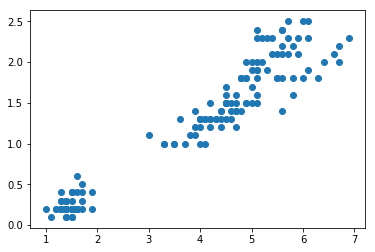

In [2]:
# just two features for simplicity
X = iris[['petal_length', 'petal_width']]

plt.scatter(X.petal_length, X.petal_width)

Start by randomly choosing 3 points:

In [3]:
starting_points = [(3, 1), (1, 2), (6, 1)]

centers = pd.DataFrame(starting_points, columns=['petal_length', 'petal_width'])
centers

,petal_length,petal_width
0,3,1
1,1,2
2,6,1


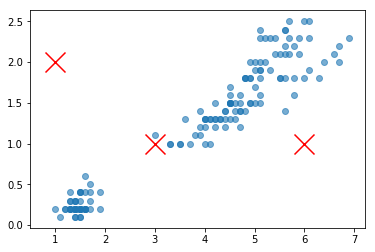

In [4]:
plt.scatter(X.petal_length, X.petal_width, alpha=0.6)
plt.scatter(centers.petal_length, centers.petal_width, marker="x", s=400, c='red')

Assign each observation to one of the 3 clusters by by calculating the distnace to each, then assinging the cluster by choosing the minimum distance.

In [5]:
def distance(x, y):
    return math.sqrt((x.petal_length - y.petal_length)**2 +
                     (x.petal_width - y.petal_width)**2)

def find_cluster(row):
    distances = centers.apply(lambda c: distance(c, row), axis=1)
    return distances.idxmin()

X['cluster'] = X.apply(find_cluster, axis=1)

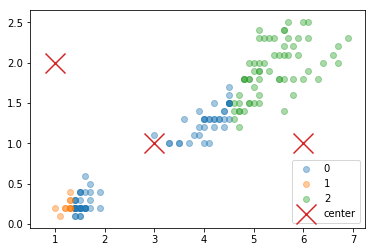

In [6]:
for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center')
plt.legend()

Now we re-calculate our centers based on the centers of the groups we've created.

In [7]:
centers = X.groupby('cluster').mean()
centers

,petal_length,petal_width
cluster,,
0,2.765789,0.750000
1,1.236364,0.227273
2,5.395238,1.911111


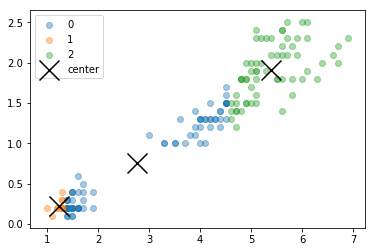

In [8]:
for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center', c='black')
plt.legend()

And that's one iteration. We now repeat the process.

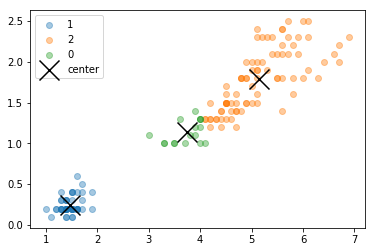

In [9]:
# Find the best cluster for each point
X['cluster'] = X.apply(find_cluster, axis=1)
# calculate new centers
centers = X.groupby('cluster').mean()

for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center', c='black')
plt.legend()

You can see that it looks like our clusters are getting "better". As we continue this process, we'll find the clusters in the data.

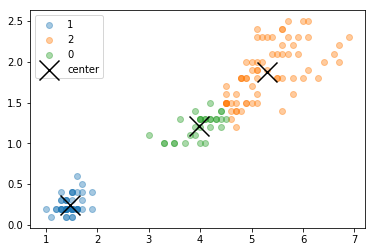

In [10]:
# Find the best cluster for each point
X.cluster = X.apply(find_cluster, axis=1)
# calculate new centers
centers = X.groupby('cluster').mean()

for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center', c='black')
plt.legend()

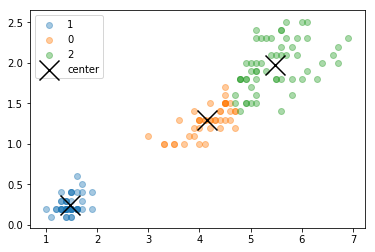

In [11]:
# Find the best cluster for each point
X['cluster'] = X.apply(find_cluster, axis=1)
# calculate new centers
centers = X.groupby('cluster').mean()

for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center', c='black')
plt.legend()

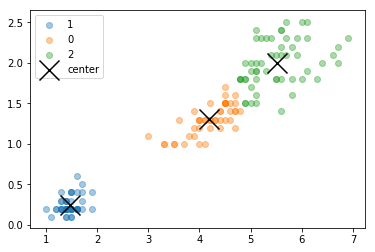

In [12]:
# Find the best cluster for each point
X['cluster'] = X.apply(find_cluster, axis=1)
# calculate new centers
centers = X.groupby('cluster').mean()

for cluster in X.cluster.unique():
    df = X[X.cluster == cluster]
    plt.scatter(df.petal_length, df.petal_width, label=cluster, alpha=.4)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, label='center', c='black')
plt.legend()

Let's now see how our clusters compare to the actual species:

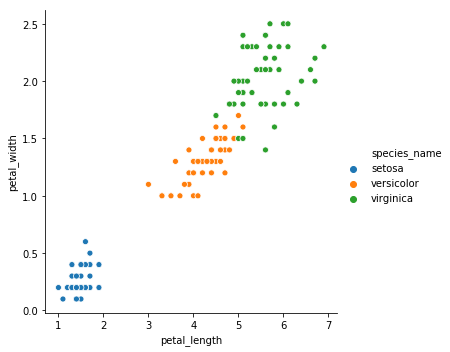

In [13]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species_name')